In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv")

In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.shape

(26406, 10)

In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [10]:
import datetime as dt
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [9]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [11]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [12]:
fire = df.groupby("Year")["Estimated_fire_area"].mean()

Text(0.5, 1.0, 'Estimated fire area')

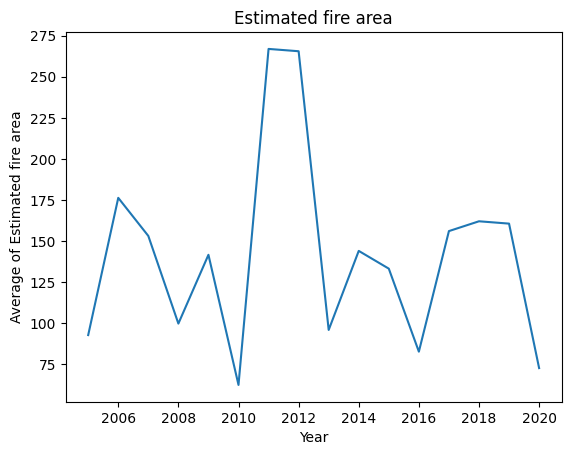

In [17]:
fire.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Average of Estimated fire area")
plt.title("Estimated fire area")

In [20]:
fire1 = df.groupby(["Year","Month"])["Estimated_fire_area"].mean()
fire1

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

Text(0.5, 1.0, 'Estimated fire area')

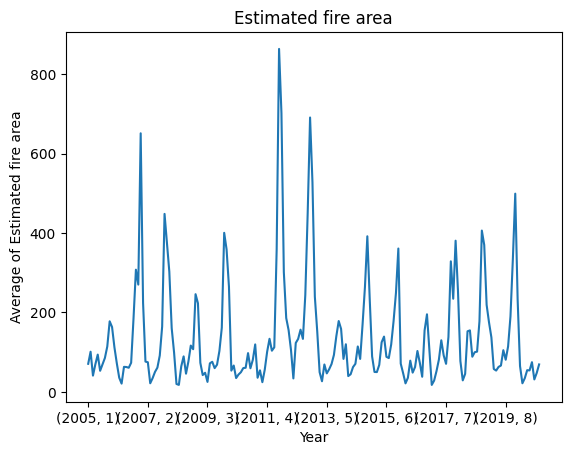

In [21]:
fire1.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Average of Estimated fire area")
plt.title("Estimated fire area")

In [22]:
df["Region"].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

Text(0.5, 1.0, 'Fire Brightness over the Region')

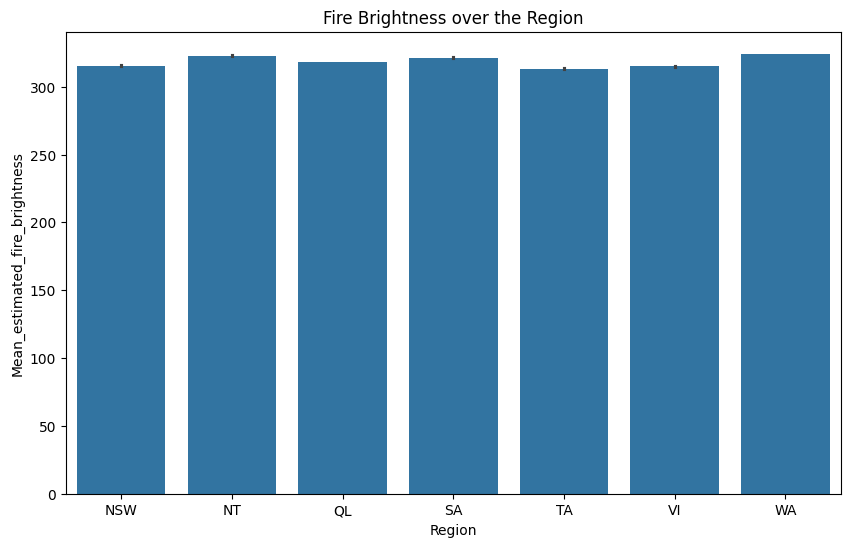

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="Region",y="Mean_estimated_fire_brightness",data=df)
plt.title("Fire Brightness over the Region")

In [32]:
pie1 = df.groupby("Region")["Count"].sum()

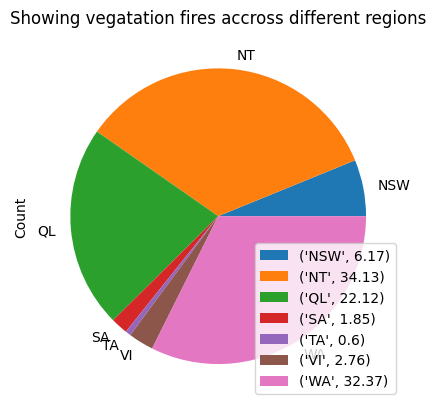

In [39]:
pie1.plot(kind="pie",labels=df["Region"].unique())
plt.title("Showing vegatation fires accross different regions")
plt.legend([(i,round(k/pie1.sum()*100,2)) for i,k in zip(pie1.index, pie1)])

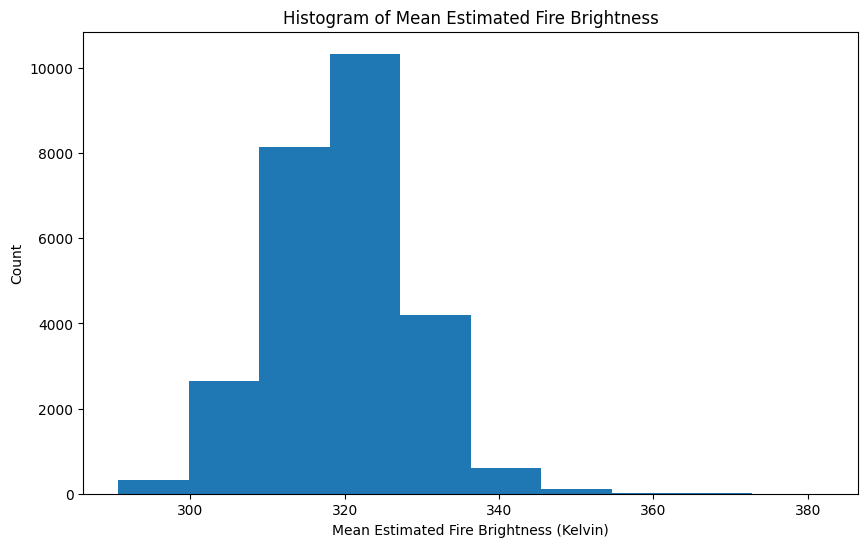

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'])
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

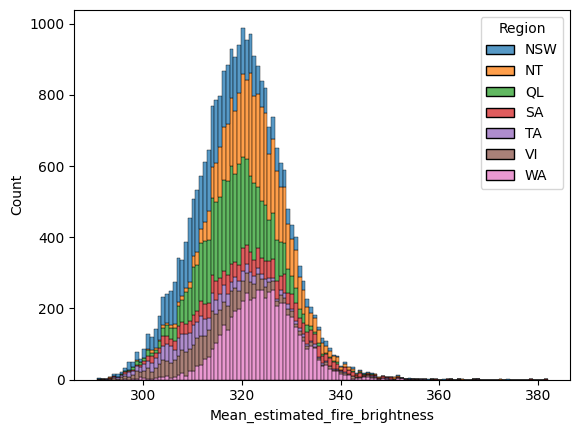

In [45]:
sns.histplot(x=df['Mean_estimated_fire_brightness'], hue=df['Region'],multiple='stack')
plt.show()

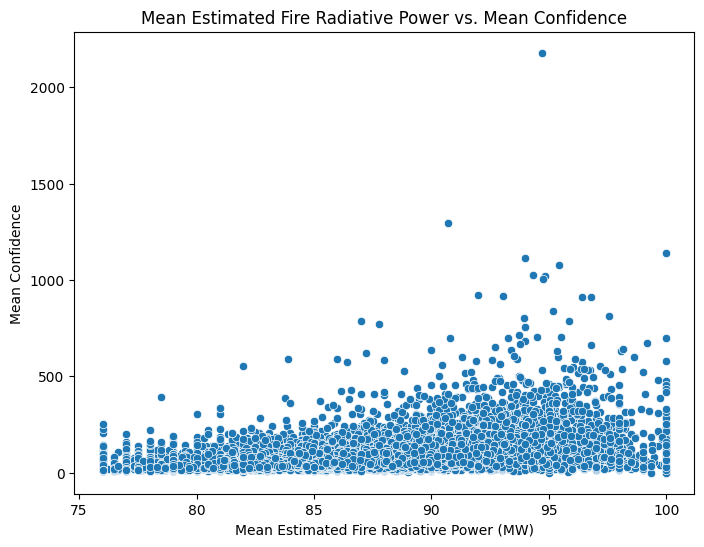

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [47]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg


,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [55]:
from folium import plugins
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)
aus_reg = plugins.MarkerCluster().add_to(Aus_map)

# Create a Folium map centered on Australia
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(aus_reg)


# add incidents to map
Aus_map
